In [1]:
import types
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 9})
# PyTorch
import torch
import torchvision
import torchmetrics

In [2]:
import sys
sys.path.append('../src/')

%load_ext autoreload
%autoreload 2
# Importing our custom module(s)
import losses
import utils

In [3]:
experiments_directory = '/cluster/tufts/hugheslab/eharve06/data-emphasized-ELBo/experiments/retrained_CIFAR-10_VI_eval=True'
first_model_name = 'l2-sp_kappa=23528.522_lr_0=0.01_n=1000_random_state=1001'
second_model_name = 'l2-sp_kappa=23528.522_lr_0=0.001_n=1000_random_state=1001'
first_temp_df = pd.read_csv(f'{experiments_directory}/{first_model_name}.csv')
second_temp_df = pd.read_csv(f'{experiments_directory}/{second_model_name}.csv')

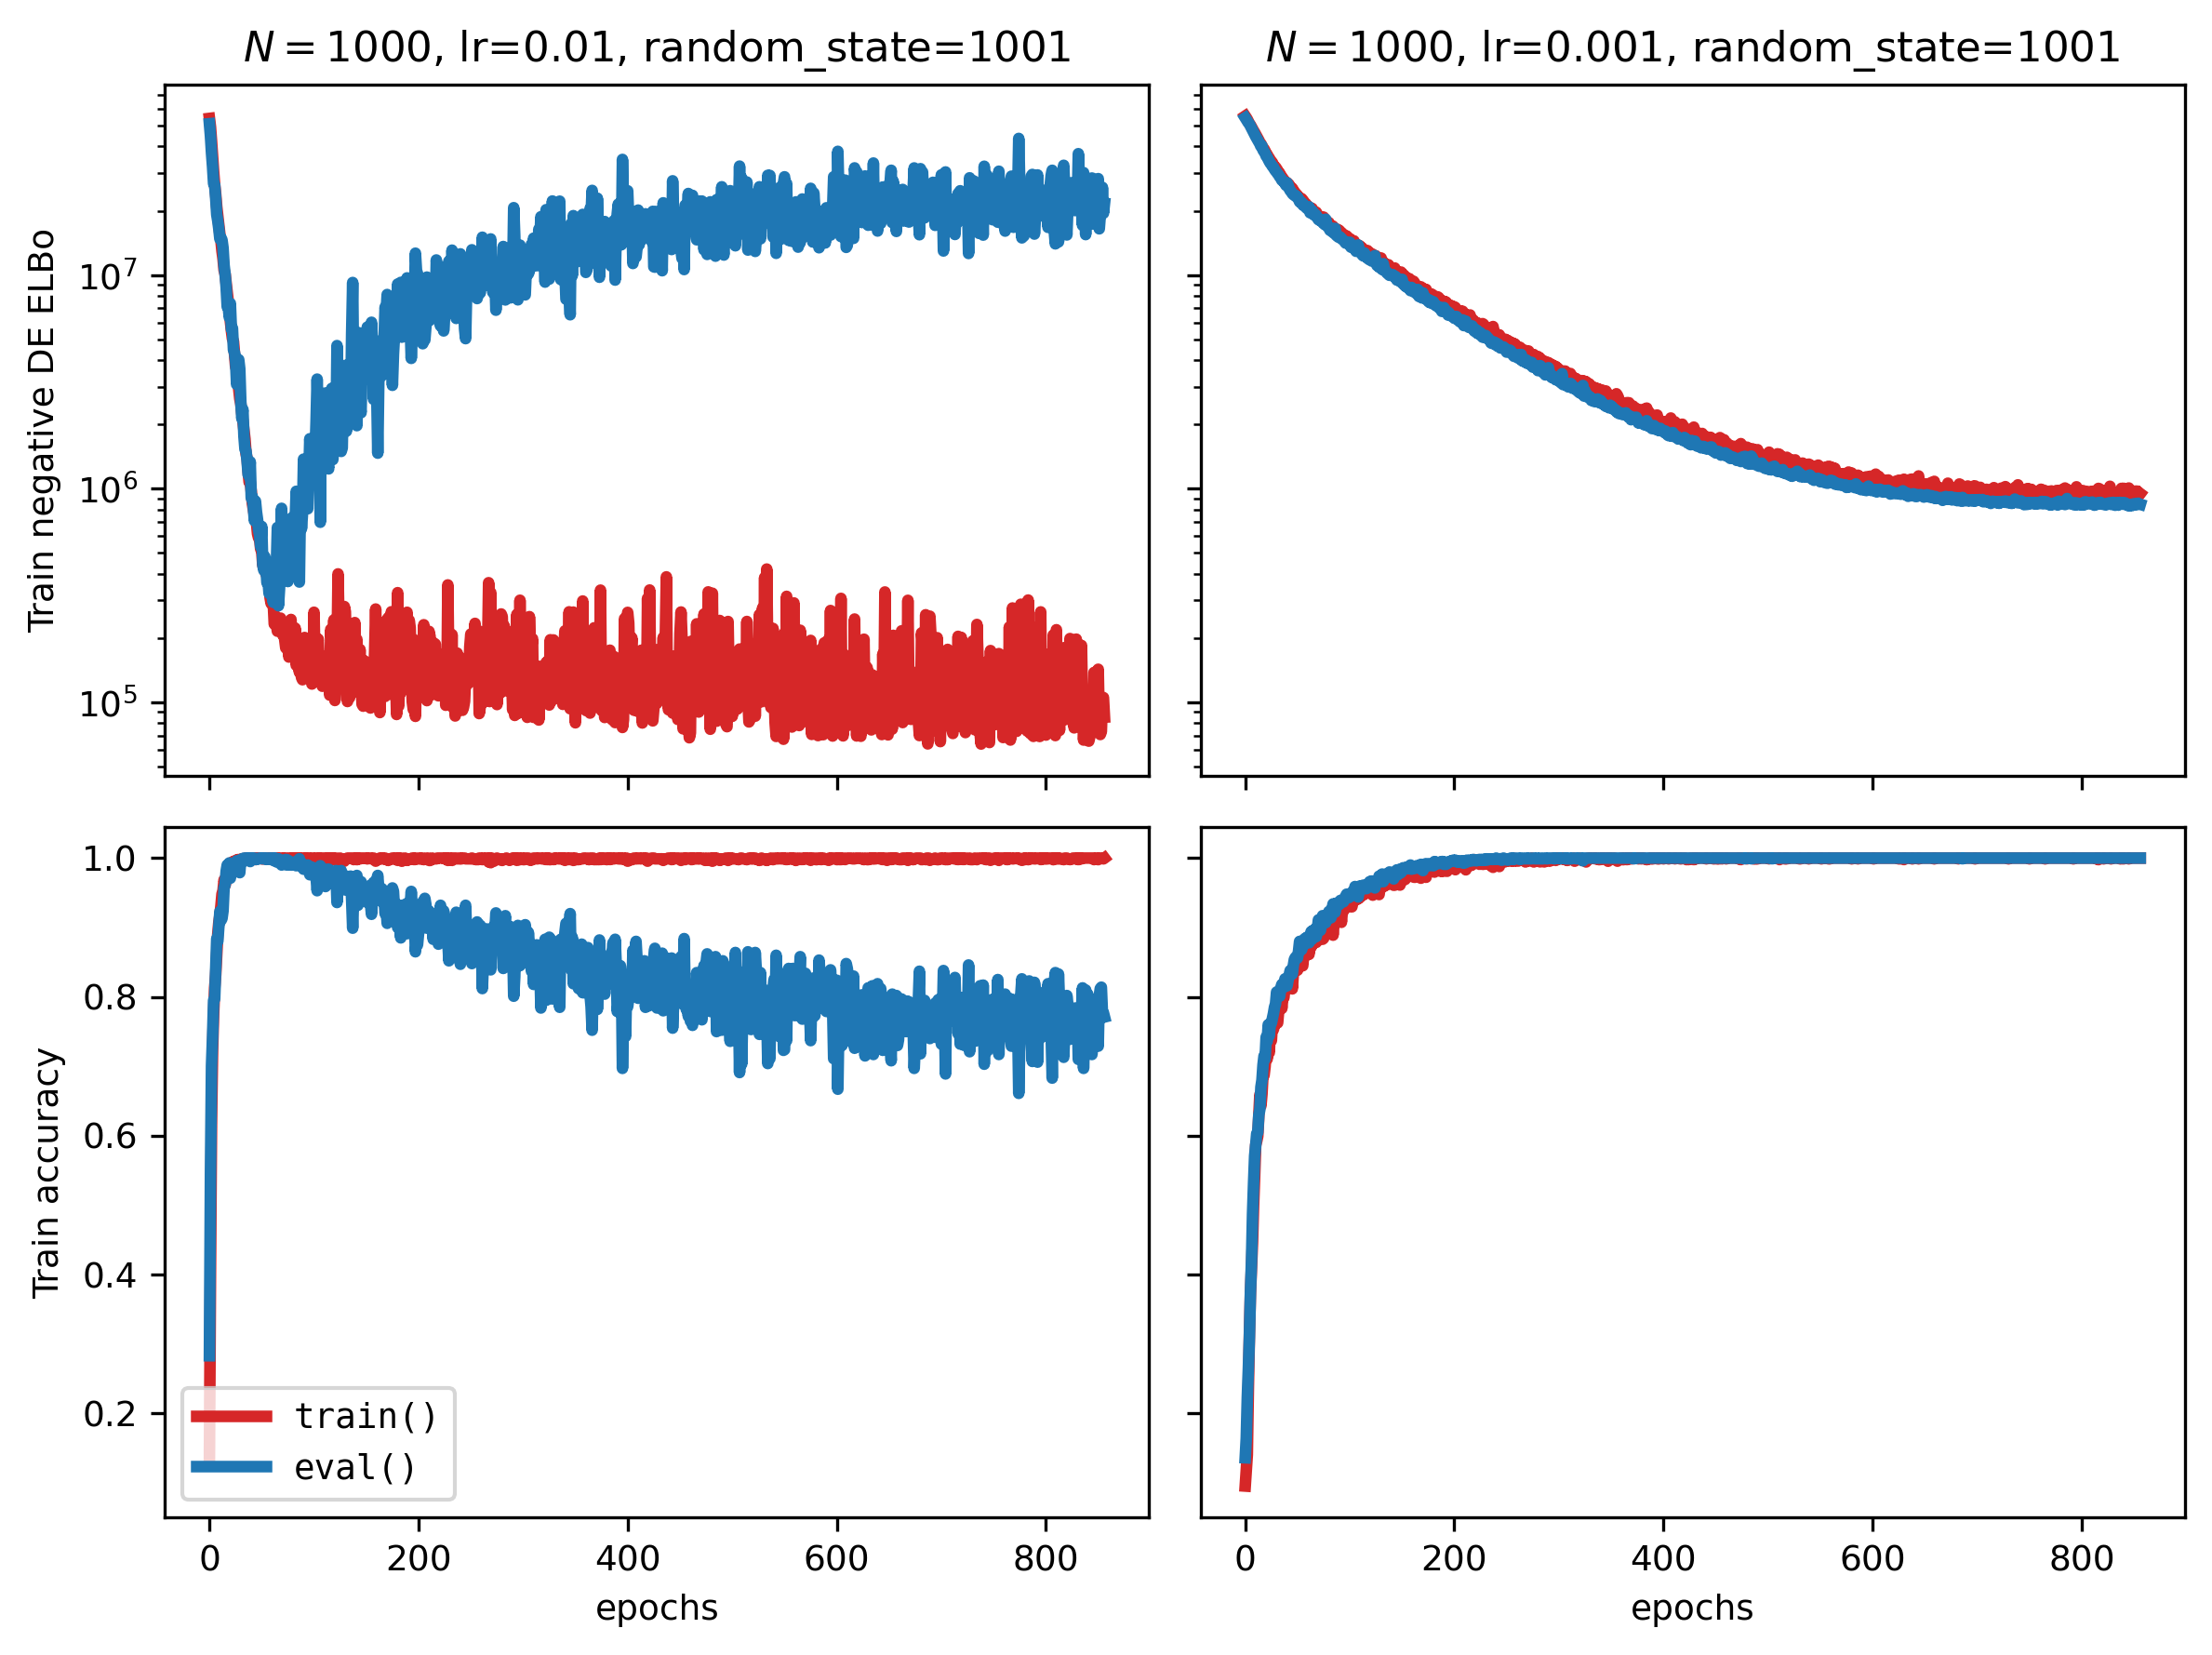

In [4]:
ncols, nrows = 2, 2
fig, axs = plt.subplots(dpi=300, figsize=(4*ncols, 3*nrows), ncols=ncols, nrows=nrows, sharex=True, sharey='row')
axs[0,0].set_title(r'$N=1000$, lr=0.01, random_state=1001')
axs[0,0].plot(first_temp_df.epoch, first_temp_df.train_loss, color='#D62728', linewidth=3)
axs[0,0].plot(first_temp_df.epoch, first_temp_df.train_eval_loss, color='#1F77B4', linewidth=3)
axs[0,0].set_yscale('log')
axs[0,0].set_ylabel(r'Train negative DE ELBo')
axs[0,1].set_title(r'$N=1000$, lr=0.001, random_state=1001')
axs[0,1].plot(second_temp_df.epoch, second_temp_df.train_loss, color='#D62728', linewidth=3)
axs[0,1].plot(second_temp_df.epoch, second_temp_df.train_eval_loss, color='#1F77B4', linewidth=3)
axs[0,1].set_yscale('log')

axs[1,0].plot(first_temp_df.epoch, first_temp_df.train_acc, color='#D62728', label='train()', linewidth=3)
axs[1,0].plot(first_temp_df.epoch, first_temp_df.train_eval_acc, color='#1F77B4', label='eval()', linewidth=3)
axs[1,0].set_xlabel('epochs')
axs[1,0].set_ylabel('Train accuracy')
axs[1,0].legend(loc='lower left', prop={'family': 'monospace'})
axs[1,1].plot(second_temp_df.epoch, second_temp_df.train_acc, color='#D62728', linewidth=3)
axs[1,1].plot(second_temp_df.epoch, second_temp_df.train_eval_acc, color='#1F77B4', linewidth=3)
axs[1,1].set_xlabel('epochs')

fig.tight_layout()
fig.savefig('train_eval_comparison.pdf', bbox_inches='tight')
plt.show()